# <center>**Flight Delay Predictions**</center>

<center><img src="https://www.webintravel.com/wp-content/uploads/2020/05/den-belitsky-GettyImages-854673918-scaled.jpg" width="700"></center>

### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

### Getting Data

In [2]:
flights = pd.read_csv('/content/flights.csv')
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448.0,404.0,4.0,430.0,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330.0,737.0,4.0,750.0,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296.0,800.0,11.0,806.0,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342.0,748.0,8.0,805.0,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448.0,254.0,5.0,320.0,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62001,2015,1,4,7,OO,4548,N161PQ,SLC,FCA,2155,2200.0,5.0,11.0,2211.0,118.0,101.0,86.0,531.0,2337.0,4.0,2353.0,2341.0,-12.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
62002,2015,1,4,7,OO,4805,N459SW,MSP,RAP,2155,NaN,NaN,NaN,NaN,112.0,NaN,NaN,489.0,NaN,NaN,2247.0,NaN,NaN,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN
62003,2015,1,4,7,OO,5531,N930SW,DEN,GTF,2155,2242.0,47.0,11.0,2253.0,120.0,117.0,100.0,624.0,33.0,6.0,2355.0,39.0,44.0,0.0,0.0,NaN,0.0,0.0,37.0,7.0,0.0
62004,2015,1,4,7,OO,7388,N560SW,SLC,EKO,2155,2153.0,-2.0,6.0,2159.0,71.0,52.0,42.0,200.0,2141.0,4.0,2206.0,2145.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


### Insight into the Data

In [3]:
# selecting a section from the dataframe
flights_needed_data = flights[0:100000]

In [4]:
flights_needed_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448.0,404.0,4.0,430.0,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330.0,737.0,4.0,750.0,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296.0,800.0,11.0,806.0,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342.0,748.0,8.0,805.0,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448.0,254.0,5.0,320.0,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62001,2015,1,4,7,OO,4548,N161PQ,SLC,FCA,2155,2200.0,5.0,11.0,2211.0,118.0,101.0,86.0,531.0,2337.0,4.0,2353.0,2341.0,-12.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
62002,2015,1,4,7,OO,4805,N459SW,MSP,RAP,2155,NaN,NaN,NaN,NaN,112.0,NaN,NaN,489.0,NaN,NaN,2247.0,NaN,NaN,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN
62003,2015,1,4,7,OO,5531,N930SW,DEN,GTF,2155,2242.0,47.0,11.0,2253.0,120.0,117.0,100.0,624.0,33.0,6.0,2355.0,39.0,44.0,0.0,0.0,NaN,0.0,0.0,37.0,7.0,0.0
62004,2015,1,4,7,OO,7388,N560SW,SLC,EKO,2155,2153.0,-2.0,6.0,2159.0,71.0,52.0,42.0,200.0,2141.0,4.0,2206.0,2145.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
flights_needed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62006 entries, 0 to 62005
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 62006 non-null  int64  
 1   MONTH                62006 non-null  int64  
 2   DAY                  62006 non-null  int64  
 3   DAY_OF_WEEK          62006 non-null  int64  
 4   AIRLINE              62006 non-null  object 
 5   FLIGHT_NUMBER        62006 non-null  int64  
 6   TAIL_NUMBER          61937 non-null  object 
 7   ORIGIN_AIRPORT       62006 non-null  object 
 8   DESTINATION_AIRPORT  62006 non-null  object 
 9   SCHEDULED_DEPARTURE  62006 non-null  int64  
 10  DEPARTURE_TIME       60573 non-null  float64
 11  DEPARTURE_DELAY      60573 non-null  float64
 12  TAXI_OUT             60543 non-null  float64
 13  WHEELS_OFF           60543 non-null  float64
 14  SCHEDULED_TIME       62005 non-null  float64
 15  ELAPSED_TIME         60398 non-null 

In [6]:
# no. of flights which were diverted
flights_needed_data.value_counts('DIVERTED')

DIVERTED
0.0    61872
1.0      133
dtype: int64

### Data Visualisation

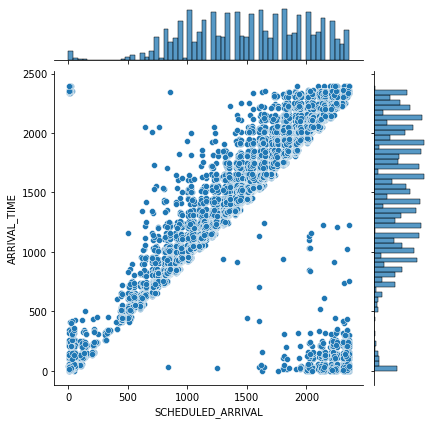

In [7]:
sb.jointplot(data=flights_needed_data, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

In [8]:
# using Pearson's correlation method
corr = flights_needed_data.corr(method='pearson')

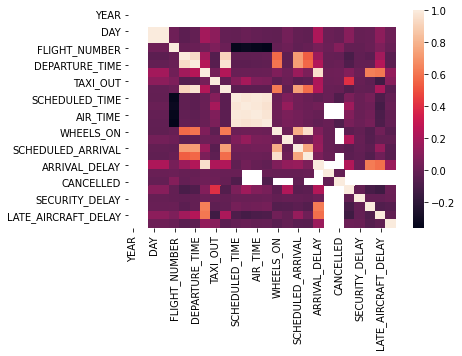

In [9]:
sb.heatmap(corr)

In [10]:
corr

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,NaN,1.000000,1.000000,0.025658,-0.037915,-0.015546,0.189676,0.120860,-0.009756,-0.014377,0.009164,-0.009941,-0.018203,-0.022263,0.040889,-0.012487,-0.022745,0.218953,0.008139,-0.008205,0.102592,-0.004183,0.000026,0.116581,0.019816
DAY_OF_WEEK,NaN,NaN,1.000000,1.000000,0.025658,-0.037915,-0.015546,0.189676,0.120860,-0.009756,-0.014377,0.009164,-0.009941,-0.018203,-0.022263,0.040889,-0.012487,-0.022745,0.218953,0.008139,-0.008205,0.102592,-0.004183,0.000026,0.116581,0.019816
FLIGHT_NUMBER,NaN,NaN,0.025658,0.025658,1.000000,-0.004669,0.006423,0.028526,0.071510,0.012871,-0.343514,-0.324862,-0.344736,-0.362676,-0.004952,0.020238,-0.021464,-0.000997,0.051497,0.014510,0.092918,-0.015804,-0.011404,0.007409,0.072376,0.001749
SCHEDULED_DEPARTURE,NaN,NaN,-0.037915,-0.037915,-0.004669,1.000000,0.945351,0.181479,-0.060596,0.919814,-0.024273,-0.027253,-0.017489,-0.008225,0.571769,-0.030570,0.726146,0.537313,0.169427,-0.004192,-0.011346,-0.100745,-0.019436,-0.039827,0.180343,-0.048408
DEPARTURE_TIME,NaN,NaN,-0.015546,-0.015546,0.006423,0.945351,1.000000,0.247924,-0.051355,0.972186,-0.037429,-0.037430,-0.029793,-0.024840,0.600950,-0.023131,0.729569,0.565166,0.234368,-0.000864,0.005554,-0.079071,-0.012642,-0.015640,0.239958,-0.037829
DEPARTURE_DELAY,NaN,NaN,0.189676,0.189676,0.028526,0.181479,0.247924,1.000000,0.044742,0.236720,0.002915,0.009712,0.001945,0.006792,0.076724,0.024961,0.162529,0.063711,0.955795,0.015405,0.021623,0.086540,0.015118,0.633527,0.616566,0.140317
TAXI_OUT,NaN,NaN,0.120860,0.120860,0.071510,-0.060596,-0.051355,0.044742,1.000000,-0.021924,0.090464,0.200813,0.074285,0.065166,-0.029166,0.011631,-0.044110,-0.030742,0.217608,0.011327,0.018275,0.404912,-0.004741,-0.030735,-0.130141,0.101687
WHEELS_OFF,NaN,NaN,-0.009756,-0.009756,0.012871,0.919814,0.972186,0.236720,-0.021924,1.000000,-0.043103,-0.039785,-0.036199,-0.033956,0.619018,-0.021441,0.737718,0.584295,0.229448,0.000036,-0.003691,-0.067792,-0.014505,-0.021023,0.216322,-0.041542


### Data Preprocessing

In [11]:
flights_needed_data=flights_needed_data.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT',
                                              'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME',
                                              'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'],
                                             axis=1)

In [12]:
flights_needed_data

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5,-11.0,430.0,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1,1,LAX,PBI,10,-8.0,750.0,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1,1,SFO,CLT,20,-2.0,806.0,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1,1,LAX,MIA,20,-5.0,805.0,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1,1,SEA,ANC,25,-1.0,320.0,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62001,1,4,SLC,FCA,2155,5.0,2353.0,2341.0,-12.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
62002,1,4,MSP,RAP,2155,NaN,2247.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN
62003,1,4,DEN,GTF,2155,47.0,2355.0,39.0,44.0,0.0,0.0,0.0,0.0,37.0,7.0,0.0
62004,1,4,SLC,EKO,2155,-2.0,2206.0,2145.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [13]:
# replacing NaN values with the mean of the attribute
flights_needed_data=flights_needed_data.fillna(flights_needed_data.mean())

In [14]:
flights_needed_data

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5,-11.000000,430.000000,408.000000,-22.000000,0.000000,0.000000,12.900729,0.084973,17.918169,26.137477,1.932741
1,1,1,LAX,PBI,10,-8.000000,750.000000,741.000000,-9.000000,0.000000,0.000000,12.900729,0.084973,17.918169,26.137477,1.932741
2,1,1,SFO,CLT,20,-2.000000,806.000000,811.000000,5.000000,0.000000,0.000000,12.900729,0.084973,17.918169,26.137477,1.932741
3,1,1,LAX,MIA,20,-5.000000,805.000000,756.000000,-9.000000,0.000000,0.000000,12.900729,0.084973,17.918169,26.137477,1.932741
4,1,1,SEA,ANC,25,-1.000000,320.000000,259.000000,-21.000000,0.000000,0.000000,12.900729,0.084973,17.918169,26.137477,1.932741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62001,1,4,SLC,FCA,2155,5.000000,2353.000000,2341.000000,-12.000000,0.000000,0.000000,12.900729,0.084973,17.918169,26.137477,1.932741
62002,1,4,MSP,RAP,2155,19.902646,2247.000000,1487.392354,18.388092,0.000000,1.000000,12.900729,0.084973,17.918169,26.137477,1.932741
62003,1,4,DEN,GTF,2155,47.000000,2355.000000,39.000000,44.000000,0.000000,0.000000,0.000000,0.000000,37.000000,7.000000,0.000000
62004,1,4,SLC,EKO,2155,-2.000000,2206.000000,2145.000000,-21.000000,0.000000,0.000000,12.900729,0.084973,17.918169,26.137477,1.932741


In [15]:
result=[]

In [16]:
# if the delay in flight's arrival is more than 15 mins, then it's definitely delayed
for row in flights_needed_data['ARRIVAL_DELAY']:
  if row > 15:
    result.append(1)
  else:
    result.append(0)  

In [17]:
flights_needed_data['result'] = result

In [18]:
flights_needed_data

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,ANC,SEA,5,-11.000000,430.000000,408.000000,-22.000000,0.000000,0.000000,12.900729,0.084973,17.918169,26.137477,1.932741,0
1,1,1,LAX,PBI,10,-8.000000,750.000000,741.000000,-9.000000,0.000000,0.000000,12.900729,0.084973,17.918169,26.137477,1.932741,0
2,1,1,SFO,CLT,20,-2.000000,806.000000,811.000000,5.000000,0.000000,0.000000,12.900729,0.084973,17.918169,26.137477,1.932741,0
3,1,1,LAX,MIA,20,-5.000000,805.000000,756.000000,-9.000000,0.000000,0.000000,12.900729,0.084973,17.918169,26.137477,1.932741,0
4,1,1,SEA,ANC,25,-1.000000,320.000000,259.000000,-21.000000,0.000000,0.000000,12.900729,0.084973,17.918169,26.137477,1.932741,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62001,1,4,SLC,FCA,2155,5.000000,2353.000000,2341.000000,-12.000000,0.000000,0.000000,12.900729,0.084973,17.918169,26.137477,1.932741,0
62002,1,4,MSP,RAP,2155,19.902646,2247.000000,1487.392354,18.388092,0.000000,1.000000,12.900729,0.084973,17.918169,26.137477,1.932741,1
62003,1,4,DEN,GTF,2155,47.000000,2355.000000,39.000000,44.000000,0.000000,0.000000,0.000000,0.000000,37.000000,7.000000,0.000000,1
62004,1,4,SLC,EKO,2155,-2.000000,2206.000000,2145.000000,-21.000000,0.000000,0.000000,12.900729,0.084973,17.918169,26.137477,1.932741,0


In [19]:
flights_needed_data.value_counts('result')

result
0    39105
1    22901
dtype: int64

In [20]:
flights_needed_data=flights_needed_data.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
flights_needed_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,5,-11.000000,430.000000,0.000000,0.000000,12.900729,0.084973,17.918169,26.137477,1.932741,0
1,1,1,10,-8.000000,750.000000,0.000000,0.000000,12.900729,0.084973,17.918169,26.137477,1.932741,0
2,1,1,20,-2.000000,806.000000,0.000000,0.000000,12.900729,0.084973,17.918169,26.137477,1.932741,0
3,1,1,20,-5.000000,805.000000,0.000000,0.000000,12.900729,0.084973,17.918169,26.137477,1.932741,0
4,1,1,25,-1.000000,320.000000,0.000000,0.000000,12.900729,0.084973,17.918169,26.137477,1.932741,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62001,1,4,2155,5.000000,2353.000000,0.000000,0.000000,12.900729,0.084973,17.918169,26.137477,1.932741,0
62002,1,4,2155,19.902646,2247.000000,0.000000,1.000000,12.900729,0.084973,17.918169,26.137477,1.932741,1
62003,1,4,2155,47.000000,2355.000000,0.000000,0.000000,0.000000,0.000000,37.000000,7.000000,0.000000,1
62004,1,4,2155,-2.000000,2206.000000,0.000000,0.000000,12.900729,0.084973,17.918169,26.137477,1.932741,0


### Splitting Data for Training and Testing

In [21]:
data = flights_needed_data.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)  # splitting in the ratio 70:30

### Standardizing 

In [22]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

### Applying Decision Tree Classifier on Training Data

In [23]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

### Making Predictions and Checking Accuracy

In [24]:
pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.9971728688559478

### <center>Predictions are 99.71% accurate.</center>